In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, roc_auc_score

In [ ]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv("../4_Reduced_Datasets/Reduced_AndroidMalwareNormal.csv", index_col=0)

1 >> 1720
0 >> 3146

In [ ]:
1720 * 0.3

516.0

In [ ]:
3146 * 0.3

943.8

In [ ]:
Bval = df[df["class"] == 0].sample(n=944, random_state=42)
Mval = df[df["class"] == 1].sample(n=516, random_state=42)
validation = pd.concat([Bval,Mval])
indexes = validation["class"].index.tolist()
validation = shuffle(validation)
validation = validation.reset_index()
validation.drop(columns=["index"], inplace=True)
x_validation = validation.drop(columns=["class"])
y_validation = validation["class"]

In [ ]:
df.drop(index=indexes, inplace=True)

In [ ]:
Btrain = df[df["class"] == 0].sample(n=964, random_state=42)
Mtrain = df[df["class"] == 1].sample(n=964, random_state=42)
train = pd.concat([Btrain,Mtrain])
indexes = train["class"].index.tolist()
train = shuffle(train)
train = train.reset_index()
train.drop(columns=["index"], inplace=True)
x_train = train.drop(columns=["class"])
y_train = train["class"]

In [ ]:
df.drop(index=indexes, inplace=True)

In [ ]:
df = shuffle(df)

In [ ]:
df = df.reset_index()

In [ ]:
df.drop(columns=["index"], inplace=True)

In [ ]:
x_test = df.drop(columns=["class"])
y_test = df["class"]

In [ ]:
RF = RandomForestClassifier()

In [ ]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
print("Curva ROC >> ", (cross_val_score(RF, x_test, y_test, scoring="roc_auc", cv = 5).mean())*100,"%")

Curva ROC >>  55.707655168473295 %


In [ ]:
print("Validacao>>",roc_auc_score(y_validation, RF.predict(x_validation))*100, "%")

Validacao>> 50.379795690448034 %


### Otimização de Hiperparâmetros

In [ ]:
params_grid = {'n_estimators': 1800,
               'min_samples_split': 2,
               'min_samples_leaf': 1,
               'max_features': 'auto',
               'max_depth': 20,
               'bootstrap': False}

In [ ]:
ORF = RandomForestClassifier(**params_grid)

In [ ]:
ORF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=1800)

In [ ]:
print("Curva ROC >> ", (cross_val_score(ORF, x_test, y_test, scoring="roc_auc", cv = 5).mean())*100,"%")

Curva ROC >>  53.63697365700231 %


In [ ]:
print("Validacao>>",roc_auc_score(y_validation, ORF.predict(x_validation))*100, "%")

Validacao>> 50.47135724609119 %


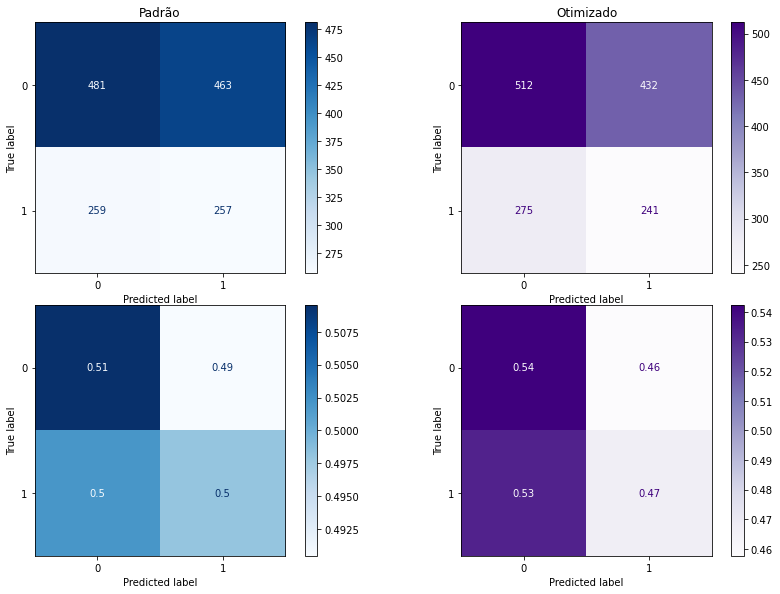

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8))
plt.tight_layout()
ax1.set(title="Padrão")
ax2.set(title="Otimizado")
plot_confusion_matrix(RF, x_validation, y_validation,ax=ax1, cmap = "Blues", values_format="d")
plot_confusion_matrix(ORF, x_validation, y_validation, ax=ax2, cmap= "Purples", values_format="d")
plot_confusion_matrix(RF, x_validation, y_validation,ax=ax3, cmap = "Blues", normalize = "true")
plot_confusion_matrix(ORF, x_validation, y_validation, ax=ax4, cmap= "Purples", normalize = "true")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=be34dc1b-561d-4c90-bae1-66eed919bb55' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>